c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


[1 1 0]


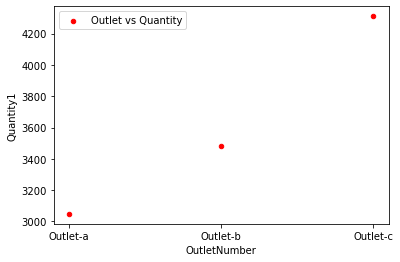

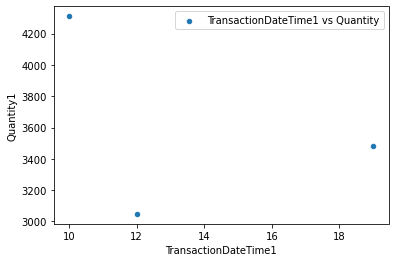

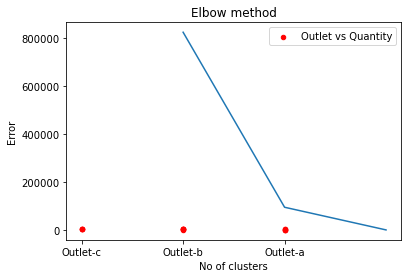

[0 0 1]
[0 1 0]


c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


PumpNumber1       7.00
Quantity1      1923.06
dtype: float64
---------------
PumpNumber1              7.0
TransactionDateTime1    12.0
dtype: float64
[1 0 1 0 2 2 1 2 0 1 2 2 2]


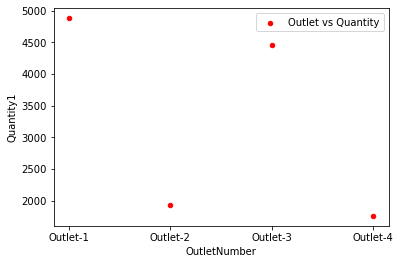

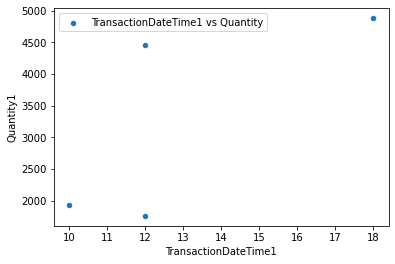

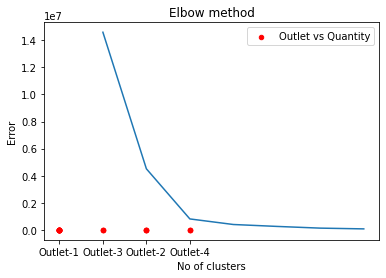

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
import datetime as dt
import TradeArea_1 as t1 # Importing All trade areas data 
%matplotlib inline

In [17]:
# Retreiving the Nozzle count of all the outlets
n1 = t1.c.groupby(['OutletNumber'])['PumpNumber1'].count().reset_index()
n2 = t1.t2.c.groupby(['OutletNumber'])['PumpNumber1'].count().reset_index()
n3 = t1.t3.c.groupby(['OutletNumber'])['PumpNumber1'].count().reset_index()
n4 = t1.t4.c.groupby(['OutletNumber'])['PumpNumber1'].count().reset_index()

# Combining all outlets nozzle count
frames = [n1, n2, n3, n4]
n5 = pd.concat(frames) # Combining all the outlets
n5

,OutletNumber,PumpNumber1
0,Outlet-1,13
1,Outlet-2,4
2,Outlet-3,3
3,Outlet-4,3
0,Outlet-a,5
1,Outlet-b,6
2,Outlet-c,4
0,Outlet-o,2
1,Outlet-p,2
2,Outlet-q,2


In [18]:
frames = [t1.c, t1.t2.c, t1.t3.c, t1.t4.c]
n6 = pd.concat(frames)

# Combining the nozzle count with pump peak hour data
na = pd.merge(n6, n5, on= 'OutletNumber')
n = pd.merge(t1.trade, n5, on = 'OutletNumber')

In [20]:
# Performing Transaction Count of each outlet
n1 = t1.df1.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n2 = t1.df2.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n3 = t1.df3.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n4 = t1.df4.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n5 = t1.t2.df1.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n6 = t1.t2.df2.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n7 = t1.t2.df3.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n8 = t1.t3.df1.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n9 = t1.t3.df2.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n10 = t1.t3.df3.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n11 = t1.t4.df1.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n12 = t1.t4.df2.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()
n13 = t1.t4.df3.groupby(['OutletNumber'])['TransactionDateTime1'].count().reset_index()

# Combining all the outlets transaction count
frames = [n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13]
n14 = pd.concat(frames)

In [21]:
# Combining the transaction count with nozzle count and peak hour pump data
n = pd.merge(n, n14, on = 'OutletNumber')
n.rename(columns = {'TransactionDateTime1_y': 'TransactionCount', 'PumpNumber1_x': 'PumpNumber1', 'TransactionDateTime1_x':'TransactionDateTime1', 'PumpNumber1_y': 'NozzleCount'}, inplace = True)

na = pd.merge(na, n14, on = 'OutletNumber')
na.rename(columns = {'TransactionDateTime1_y': 'TransactionCount', 'PumpNumber1_x': 'PumpNumber1', 'TransactionDateTime1_x':'TransactionDateTime1', 'PumpNumber1_y': 'NozzleCount'}, inplace = True)

In [22]:
n.head(12)

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,NozzleCount,TransactionCount
0,Outlet-1,13,4883.22,18,13,66239
1,Outlet-2,6,1923.06,10,4,31487
2,Outlet-3,6,4456.82,12,3,16755
3,Outlet-4,1,1757.12,12,3,19156
4,Outlet-a,5,3047.78,12,5,42997
5,Outlet-b,6,3482.51,19,6,60821
6,Outlet-c,4,4311.29,10,4,71595
7,Outlet-o,2,3004.25,9,2,9301
8,Outlet-p,2,1552.31,11,2,7603
9,Outlet-q,2,4582.10,13,2,14432


In [23]:
# Independent Variables
x = n[['Quantity1', 'TransactionDateTime1', 'TransactionCount']]
y = n['NozzleCount']
# Depenedent Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10) # Data Split to train & test

# Multiple Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = linear_regression.predict(x_test)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # Predicted Nozzle Count
predictions

,Actual,Predicted
3,3,3.329384
7,2,1.676144
11,5,6.197204


In [25]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
score =r2_score(y_test, y_pred)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) # Compare with RMSE
print('r2 socre is' ,score) # The best r2-score is 1.0
print('Root Mean Squared Error', test_set_rmse) # The lower the value is, the better fit''' 
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.6168145842019929
r2 socre is 0.6471413412694009
Root Mean Squared Error 0.7408719504167135
Mean Squared Error: 0.5488912469142652


Text(0, 0.5, 'NozzleCount')

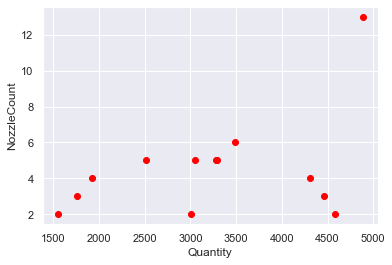

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y = y, x = n['Quantity1'], color = 'red') # Data used in regression. Visualization
plt.xlabel('Quantity')
plt.ylabel('NozzleCount')

In [11]:
import seaborn as sns
sns.set(color_codes=True)
tips = sns.load_dataset("tips")

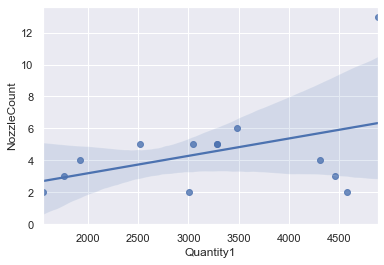

In [12]:
sns.regplot(y = n['NozzleCount'], x = n['Quantity1'], data=tips); # Regression Plot

In [16]:
n.sort_values(['Quantity1'], ascending = False).reset_index()
#t1.c

,index,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,NozzleCount,TransactionCount
0,0,Outlet-1,13,4883.22,18,13,66239
1,9,Outlet-q,2,4582.10,13,2,14432
2,2,Outlet-3,6,4456.82,12,3,16755
3,6,Outlet-c,4,4311.29,10,4,71595
4,5,Outlet-b,6,3482.51,19,6,60821
5,12,Outlet-z,2,3287.08,10,5,31820
6,10,Outlet-x,10,3284.58,11,5,25891
7,4,Outlet-a,5,3047.78,12,5,42997
8,7,Outlet-o,2,3004.25,9,2,9301
9,11,Outlet-y,6,2518.97,14,5,50720


In [15]:
na.sort_values(['Quantity1'], ascending = False).reset_index()

,index,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,NozzleCount,TransactionCount
0,0,Outlet-1,13,4883.22,18,13,66239
1,38,Outlet-q,2,4582.10,13,2,14432
2,13,Outlet-3,6,4456.82,12,3,16755
3,23,Outlet-c,4,4311.29,10,4,71595
4,1,Outlet-1,1,3828.50,11,13,66239
5,27,Outlet-b,6,3482.51,19,6,60821
6,2,Outlet-1,16,3391.72,18,13,66239
7,28,Outlet-b,9,3353.83,19,6,60821
8,24,Outlet-c,1,3324.01,11,4,71595
9,44,Outlet-z,2,3287.08,10,5,31820
